<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <p style=" text-align: center; font-size: 32px;">   
   <strong>Uncertain Mortality Model for reinsurance deals</strong></p>
    <p style=" text-align: center; font-size: 25px;"><strong> Master Probabilities & Finance - Ecole Polytechnique and Sorbonne University <strong></p>
  <p style=" text-align: center; font-size: 20px;"> Constantin GLEYZE - Based on some LateX and algorithms of Julien Guyon</p>
</header>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Introduction</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

# Uncertain Mortality Model vs American Options

#### Re-insurance Deals

In this project, we study the *Uncertain Mortality Model* for the pricing of reinsurance deals. For the sake of simplicity, we only consider one type of default: the risk of death.

We consider the following reinsurance product:

- At maturity, if the insurance subscriber is alive, the issuer delivers a put on the underlying $X$

$$
u^\textrm{mat}( x) = (K_\textrm{mat} - x)_+.
$$

- At the time of death, if it is before the maturity, the issuer delivers an exit payoff, typically another put on the underlying $X$.

$$
u^D(t, x) = (K_D - x)_+.
$$

- The subscriber pays a constant fee $α\Delta t$ at every time step until death or the maturity or the product

- The insurance sells a large number of these contracts to subscribers. We assume that the times of death of the subscribers $\tau^D$ are independent, and identically distributed, and also independent of the underlying's stock price.

- We assume that the underlying's risk neutral price dynamics is the Black-Scholes model with zero interest rate/repo/dividend yield

$$
dX_t = \sigma X_t d W_t.
$$

#### The Insurers' Approach and Risk-Neutral Pricing

This contract shows two types of risk: the times of death of the subscribers and the changes in the price of the underlying. 

In this case, the issuer can apply the insurer's approach to the risk of death times, i.e., the law of large numbers. The more people buy the contract, the less risk.

Choosing a risk-neutral measure under which the death times $\tau^D$ have the same distribution as under the historical probability measure is equivalent to applying the arbitrage-pricing approach to the financial risk insurer's rule on the risk of death. The price of the contract is then

$$
u(t, x) = \mathbb{E}^\mathbb{Q}_{t, x} \left[u^\textrm{mat}(X_T) \mathbb{1}_{\tau^D \geq T} -\int_t^T\alpha\mathbb{1}_{\tau^D>s}ds+ u^D(\tau^D, X_{\tau^D}) \mathbb{1}_{\tau^D < T} \right].
$$

#### Deterministic Death Rate

If the death intensity is a deterministic function $\lambda_t^D$ (i.e. $\tau^D$ has an exponential distribution with time-dependent intensity $\lambda_t^D$), then we have seen that $u$ is the solution to the linear PDE

$$
\left\{\begin{array}{l}
\partial_t u + \frac{1}{2} \sigma^2 x^2 \partial_x^2 u -\alpha + \lambda_t^D \cdot (u^D - u) = 0,\\
u(T, \cdot) \equiv u^\textrm{mat}.
\end{array}\right.
$$

#### Uncertain Mortality Model

If the death rate is uncertain, we assume that it is adapted (i.e., it does not look into the future) and belongs to a moving corridor
$\left[\underline{\lambda}_t, \overline{\lambda}_t\right]$. The most conservative way to price the contract is to compute the (financially) worst death rate process $\lambda_t^D$ as being chosen so as to maximize the value of the contract. The resulting HJB equation is

$$
\left\{\begin{array}{l}
\partial_t u + \frac{1}{2} \sigma^2 x^2 \partial^2_x u -\alpha + \Lambda^D(t, u^D - u) \cdot (u^D - u) = 0,\\
u(T, \cdot) \equiv u^\textrm{mat},
\end{array}\right.
$$
where the function $\Lambda^D$ is defined by
$$
\Lambda^D (t, y) = \left\{\begin{array}{l}
    \overline{\lambda}^D_t \quad \textrm{if} \ y \geq 0, \\
    \underline{\lambda}^D_t \quad \textrm{otherwise.}
\end{array}\right.
$$

## Link with $1$-BSDE and Numerical Schemes

From the Pardoux-Peng theorem, we know that the solution $u(0, x)$ can be represented as the solution $Y_0^x$ to the $1$-BSDE

$$
dY_t = -f(t, X_t, Y_t, Z_t) \, dt + Z_t \, dW_t,
$$

with the terminal condition $Y_T = u^\textrm{mat} (X_T)$, where $X_0 = x$ and

$$
f(t, x, y, z) = -\alpha + \Lambda^D(t, u^D(t, x) - y) \cdot (u^D(t, x) - y).
$$


## BSDE Discretization

### Explicit Euler Schemes

\begin{align*}
Y_{t_n} =& \ u^{\text{mat}}\left(X_{t_n}\right)\\
Y_{t_{i - 1}} =& \ \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] -\alpha\Delta t_i + \Lambda^D \left(t_{i - 1}, u^D(t_{i - 1} , X_{t_{i - 1}}) - \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ]\right) \cdot \left( u^D(t_{i - 1}, X_{t_{i - 1}}) - \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] \right) \Delta t_i\\
=& -\alpha\Delta t_i + \left( \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] \left( 1 - \overline{\lambda}^D \Delta t_i \right) +
u^D(t_{i - 1}, X_{t_{i - 1}}) \overline{\lambda}^D \Delta t_i \right) \mathbb{1}_{u^D\left(t_{i - 1}, X_{t_{i - 1}}\right) \geq \mathbb{E}_{i-1}[Y_{t_i}]}\\
& + \left( \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] \left( 1 - \underline{\lambda}^D \Delta t_i \right) +
u^D(t_{i - 1}, X_{t_{i - 1}}) \underline{\lambda}^D \Delta t_i \right) \mathbb{1}_{u^D\left(t_{i - 1}, X_{t_{i - 1}}\right) < \mathbb{E}_{i-1}[Y_{t_i}]}.
\end{align*}

### Implicit Euler Scheme

\begin{align*}
Y_{t_n} =& \ u^{\text{mat}}\left(X_{t_n}\right)\\
Y_{t_{i - 1}} =& \ \mathbb{E}^\mathbb{Q}_{i - 1} [Y_{t_i}] -\alpha\Delta t_i+ \Lambda^D \left(t_{i - 1}, u^D(t_{i - 1}, X_{t_{i - 1}}) - Y_{t_{i - 1}}\right) \cdot \left( u^D(t_{i - 1}, X_{t_{i - 1}}) - Y_{t_{i - 1}} \right) \Delta t_i.
\end{align*}

The implicit scheme involves $Y_{t_{i - 1}}$ on both sides of the equation, which generally requires a root-finding routine to find $Y_{t_{i - 1}}$. However in this specific case, it can be shown that 

\begin{equation}u^D(t_{i-1}, X_{t_{i-1}}) \geq Y_{t_{i-1}}\quad\text{if and only if}\quad u^D(t_{i-1}, X_{t_{i-1}}) \geq \mathbb{E}^{\mathbb{Q}}_{i-1}\left[Y_{t_i}\right]-\alpha\Delta t_i.\end{equation}

Thus

\begin{split}
Y_{t_{i - 1}} =& \frac{1}{1 + \overline{\lambda}^D \Delta t_i} \left( \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] - \alpha\Delta t_i +
u^D(t_{i - 1}, X_{t_{i - 1}}) \overline{\lambda}^D \Delta t_i \right) \mathbb{1}_{u^D\left(t_{i - 1}, X_{t_{i - 1}}\right) \geq \mathbb{E}_{i-1}[Y_{t_i}]-\alpha\Delta t_i}\\
& + \frac{1}{1 + \underline{\lambda}^D \Delta t_i} \left( \mathbb{E}^\mathbb{Q}_{i - 1} [ Y_{t_i} ] -\alpha\Delta t_i +
u^D(t_{i - 1}, X_{t_{i - 1}}) \underline{\lambda}^D \Delta t_i \right) \mathbb{1}_{u^D(t_{i - 1}, X_{t_{i - 1}}) < \mathbb{E}_{i-1}[Y_{t_i}]-\alpha\Delta t_i}.
\end{split}

<b>Note.</b> To be more specific about the payouts of the product, we make the following assumptions:

- We assume that all transactions occur at the end of the month, i.e. the insurance subsriber is expected to pay a fee of $\alpha/12$ at the end of each month; if the subscriber dies in the middle of the month, the death payment will be made at the end of that month. 

- If the death occurs at the maturity, we assume that the death comes first and the death payment $u^D$ will be made.

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Global functions</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [19]:
def blackscholes_mc(S=100, vol=0.2, r=0, q=0, ts=np.linspace(0, 1, 13), npaths=10):
    """Generate Monte-Carlo paths in Black-Scholes model.

    Parameters
    ----------
    S: scalar
        The spot price of the underlying security.
    vol: scalar
        The implied Black-Scholes volatility.
    r: scalar
        The annualized risk-free interest rate, continuously compounded.
    q: scalar
        The annualized continuous dividend yield.
    ts: array_like
        The time steps of the simualtion
    npaths: int
        the number of paths to simulate

    Returns
    -------
    paths: ndarray
        The Monte-Carlo paths.
    """
    nsteps = len(ts) - 1
    ts = np.asfarray(ts)[:, np.newaxis]
    W = np.cumsum(np.vstack((np.zeros((1, npaths), dtype=np.float64),
                             np.random.randn(nsteps, npaths) * np.sqrt(np.diff(ts, axis=0)))),
                  axis=0)
    paths = np.exp(-0.5*vol**2*ts + vol*W)*S*np.exp((r-q)*ts)
    return paths

def blackscholes_price(K, T, S, vol, r=0, q=0, callput='call'):
    """Compute the call/put option price in the Black-Scholes model
    
    Parameters
    ----------
    K: scalar or array_like
        The strike of the option.
    T: scalar or array_like
        The maturity of the option, expressed in years (e.g. 0.25 for 3-month and 2 for 2 years)
    S: scalar or array_like
        The current price of the underlying asset.
    vol: scalar or array_like
        The implied Black-Scholes volatility.
    r: scalar or array_like
        The annualized risk-free interest rate, continuously compounded.
    q: scalar or array_like
        The annualized continuous dividend yield.
    callput: str
        Must be either 'call' or 'put'.

    Returns
    -------
    price: scalar or array_like
        The price of the option.

    Examples
    --------
    >>> blackscholes_price(95, 0.25, 100, 0.2, r=0.05, callput='put')
    1.5342604771222823
    """
    F = S*np.exp((r-q)*T)
    v = np.sqrt(vol**2*T)
    d1 = np.log(F/K)/v + 0.5*v
    d2 = d1 - v
    try:
        opttype = {'call':1, 'put':-1}[callput.lower()]
    except:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = opttype*(F*norm.cdf(opttype*d1)-K*norm.cdf(opttype*d2))*np.exp(-r*T)
    return price


def pwlinear_basis(xknots):
    """Basis that represent a piecewise linear function with given knots"""
    fs = [lambda x: np.ones_like(x, dtype=np.float64), lambda x: x-xknots[0]]
    fs.extend([lambda x, a=xknots[i]: np.maximum(x-a, 0) for i in range(len(xknots))])
    return fs

def pwlinear_fit(xdata, ydata, xknots):
    """Fit a piecewise linear function with xknots to xdata and ydata"""
    fs = pwlinear_basis(xknots)
    A = np.vstack([f(xdata) for f in fs]).T
    ps = np.linalg.lstsq(A, ydata, rcond=None)[0]
    return ps, fs

In [20]:
def exponential_samples(n, lambd):
    """Generate n samples from exponential distribution with rate lambd"""
    return -np.log(np.random.rand(n))/lambd

def pwlinear_fit_bis(xdata, ydata, xknots):
    """Fit a piecewise linear function with xknots to xdata and ydata"""
    fs = pwlinear_basis(xknots)
    A = np.vstack([f(xdata) for f in fs]).T
    ps = np.linalg.lstsq(A, ydata, rcond=None)[0]
    return A@ps,ps

def payoff_put (S,K): 
    """Return the payoff of a put for given prices and strikes"""
    return np.maximum((K-S),0)

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Deterministic Mortality Rate Models</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

**We now assume that the mortality rate $\lambda^D$ is deterministic. For the purposes of this analysis, we fix it at 2.5%. We will now use two distinct Monte Carlo methods and compare them.**

## 1. By simulating time of deaths

We assume that the underlying's risk neutral price dynamics is the Black-Scholes model with zero interest rate/repo/dividend yield

$$dX_t = \sigma X_t d W_t,\quad X_0=100,\quad\sigma=0.3$$

We shall price the reinsurance deal using two Monte Carlo methods explained below.

<b>(a).</b> (Direct simulation of death times) Implement a Monte Carlo simulation by directly simulating death time $\tau^D$ for each path to estimate the quantity

$$u(t, x) = \mathbb{E}^\mathbb{Q}_{t, x} \left[u^\textrm{mat}(X_T) \mathbb{1}_{\tau^D \geq T} - \int_t^T\alpha \mathbb{1}_{\tau^D> s}ds
+ u^D(\tau^D, X_{\tau^D}) \mathbb{1}_{\tau^D < T} \right],$$

We simulate m paths of the underlying for a discretisation $0 = t_0, ..., t_N = T$ : $ ((X_n^{j})_{n = 0, ..., N})_{j = 1, ..., m}$. 

Because $\tau^{D} \sim exp(\lambda^{D})$, we have by Fubini : 

$$\mathbb{E}^\mathbb{Q}_{t, x} \left[\int_t^T\alpha \mathbb{1}_{\tau^D> s}ds\right] = \alpha\int_t^T \mathbb{P}(\tau^{D} > s)ds = \alpha\int_t^T e^{-\lambda^{D}s}ds = \frac{\alpha}{-\lambda^{D}}(e^{-\lambda^{D}T}-e^{-\lambda^{D}t})$$

Therefore :  $$u(t, x) = \mathbb{E}^\mathbb{Q}_{t, x} \left[u^\textrm{mat}(X_T) \mathbb{1}_{\tau^D \geq T} - \int_t^T\alpha \mathbb{1}_{\tau^D> s}ds + u^D(\tau^D, X_{\tau^D}) \mathbb{1}_{\tau^D < T} \right],$$

We rewrite according to the discretisation : 

$$u(t_k, x) = \mathbb{E}^\mathbb{Q}_{t_k, x} \left[u^\textrm{mat}(X_{t_N}) \mathbb{1}_{\tau^D \geq t_N} - \int_{t_k}^{t_N}\alpha \mathbb{1}_{\tau^D> s}ds + u^D(\tau^D, X_{\tau^D}) \mathbb{1}_{\tau^D < t_N} \right],$$

that we estimate through : 

$$\hat u(t_k, x) = \frac{1}{m} \sum_{j=1}^{m} (u^\textrm{mat}(X_{t_N}^{(j)}) + \frac{\alpha}{\lambda^{D}}(e^{-\lambda^{D}t_N}-e^{-\lambda^{D}t_k}) + u^D(\tau^D, X_{\tau^D}^{(j)}) \mathbb{1}_{\tau^D < t_N})$$

## 2. Without simulating time of deaths

The reinsurance deal satisfies the following linear PDE 

$$\left\{\begin{array}{l}\partial_t u + \frac{1}{2}\sigma^2 x^2 \partial_x^2 u - \alpha + \lambda^D \cdot (u^D - u) = 0\\
        u(T, x) \equiv u^\textrm{mat}(x)\end{array}\right.$$
        
If u is solution of the given linear PDE, then u can be written as (Cauchy problem) : 

$$u(t, x) = \mathbb{E}^{\mathbb{Q}}_{t, x} \left[ u^\textrm{mat}(X_T) e^{-\int_t^T \lambda^D ds} + \int_t^T e^{-\int_t^s \lambda^D du} \left( \lambda^D u^D(s, X_s) - \alpha \right) ds \right]$$

We approximate it, through the same notations and discretisation as above by : 

$$\hat{u}(t_k, x) = \frac{1}{m} \sum_{j=1}^{m} \left( u^\textrm{mat}(X_{t_N}^{(j)}) e^{-(t_N - t_k)\lambda^{D}} + \int_{t_k}^{t_N} e^{-(s - t_k) \lambda^D} \left( \lambda^{D} u^D(s, X_s^{(j)}) - \alpha \right) ds \right)$$

We compute the integral by discretizing them and taking the high value on the interval. 

In [21]:
class insurance_model:
    """Class that store the dynamic of the underlying for the insurance model with several methods to compute the re-insurance deals price
     
    Initial parameters of the class
    ----------
    X0: scalar or array_like
        The current price of the underlying asset
    vol: scalar or array_like
         The volatility
    r:  scalar or array_like
        The annualized risk-free interest rate, continuously compounded
    q:  scalar or array_like
        The annualized continuous dividend yield

    Methods : 

    All algorithms estimates the continuation value through piecewise linear function
    
    1. deterministic_reinsurance_price : Pricing using Monte Carlo simulations by simulating or not and death times
    2. 1_BSDE_uncertain_mortality_reinsurance_price : Pricing using 1-BSDE approach with implicit Euler Scheme
    3. lower_bound_BSDE_uncertain_mortality_reinsurance_price : Pricing of the lower bound using BSDE approach and implicit Euleur Scheme
    4. LS_uncertain_mortality_reinsurance_price ; Pricing using the BSDE approach
    
    """
    
    #Initialisation of the parameters of the class
    def __init__(self, X0: float=100, vol: float=0.3, r: float =0., q: float =0.):        
        self.X0 = X0
        self.vol = vol
        self.r = r
        self.q = q

    def deterministic_reinsurance_price (self, ts, Kmat, Kd, alpha, lambda_param, npaths,payoff_function, give_var = False, time_death_simulation=False ):

        """Pricing using  using Monte Carlo simulations by simulating or not and death times
    
        Parameters
        ----------
        ts : scalar or array_like 
             Discrete knots of the subdivisions of the current date and the maturity. 
        Kmat: scalar or array_like
            The strike of the option at maturity
        Kd: scalar or array_like
            The strike of the option if death occured before maturity
        alpha: scalar or array_like
               The constant fee to pay during the life of the re-insurance deal 
        lambda_param : scalar or array_like
                       Parameters of the exponential law for the time of deaths
        npaths : scalar
                 Number of simulated paths of the underlyings used for Monte Carlo
        payoff_function : function (S : scalar or array like, K : scalar or array like)
                          Payoff function for the derivatives.
                          S : Price of the underlying
                          K : Strike 
                          Return : scalar or array like
        give_var : bool
                   Option to return the variance of our Monte Carlo method
        time_death_simulation : bool
                                Option to use the Monte Carlo with or without simulating the price

        Returns
        -------
        price: scalar
            The price of the reinsurance deal.
    
        Example
        --------
        >>> model = insurance_model(X0=100, vol=0.3, r=0, q=0)
        >>> model.deterministic_reinsurance_price([0., 0.08333333, 0.16666667, 0.25, 0.33333333, 0.41666667, 0.5, 0.58333333, 0.66666667, 0.75, 0.83333333, 0.91666667, 1], 90, 100, 3, 0.025, 10000,payoff_put,give_var = True, time_death_simulation=True)
        4.077781629370903, 0.00012116458434416642
        """
        
        X = blackscholes_mc(self.X0, self.vol, self.r, self.q, ts, npaths) # Generation of the paths
        cst = -(alpha/lambda_param)*(np.exp(-lambda_param*ts[-1]) - np.exp(-lambda_param*ts[0])) # Computation of the constant with alpha constant

        # If the Monte Carlo is done by simulating the time deaths
        if time_death_simulation : 

            # We determine which strike we should take according to the death time simulated (we determine the index)
            to_d = exponential_samples(npaths, lambda_param)
            maturity_time =  to_d >=ts[-1]
            death_time = ~maturity_time

            #We compute the payoff at maturity when the death thime occured after the maturity
            mc_values = np.full(npaths, np.nan, dtype = np.float64)
            mc_values[maturity_time] = payoff_function(X[-1,maturity_time],Kmat)

            #Otherwise we take the payoff at the time the death time occured
            idx_1 = np.searchsorted(ts, to_d[death_time], side='right')
            mc_values[death_time] = payoff_function(X[idx_1, death_time], Kd)

            # If the variance of our Monte Carlo method is asked give it and in both case return the average (deduced from the constante part with alpha)
            if give_var : 
                 return np.mean(mc_values - cst), np.var(mc_values - cst)/npaths
            else : 
                return np.mean(mc_values - cst)

        # If the Monte Carlo is done withtout simulating the time deaths
        else : 

            #Compute the payoff part with Kmat
            maturity = np.exp(-lambda_param*ts[-1])*payoff_function(X[-1,:],Kmat)

            #Estimation of the integral part
            discount = np.exp(-lambda_param * ts[1:])
            coeff_integral = discount*lambda_param*np.diff(ts)
            integral_death = np.einsum('ij,i->j', payoff_function(X[1:, :], Kd), coeff_integral)

            # If the variance of our Monte Carlo method is asked give it and in both case return the average (deduced from the constante part with alpha)
            if give_var : 
                 return np.mean(maturity - cst + integral_death), np.var(maturity - cst + integral_death)/npaths
            else : 
                return np.mean(maturity - cst + integral_death)

In [22]:
# Model parameters
X0 = 100                         # Initial underlying price
vol = 0.3                        # Volatility
r = 0                            # Risk-free rate
q = 0                            # Dividend yield

T = 10                           # Maturity (years)
Kmat = 90                        # Strike of the put at maturity
Kd = 100                         # Strike of the put in case of death
n_months = 12 * T                # Total number of months
ts = np.linspace(0,T,n_months+1) # Monthly discretisation until maturity
npaths = 1000000                 # Number of Monte Carlo simulations
lambda_param = 0.025             # Mortality intensity
alpha = 3                        # Annual premium

model = insurance_model(X0=100, vol=0.3, r=0, q=0) #Initialisation of our model
deterministic_no_simu_price1,deterministic_no_simu_var1 = model.deterministic_reinsurance_price(ts, Kmat, Kd, alpha, lambda_param, npaths,payoff_put,give_var = True, time_death_simulation=True)
deterministic_simu_price2,deterministic_simu_var2 = model.deterministic_reinsurance_price(ts, Kmat, Kd, alpha, lambda_param, npaths,payoff_put,give_var = True, time_death_simulation=False)

print (f"\nReinsurance-deals pricing with simulation time of deaths : {deterministic_no_simu_price1:.4f} (variance = {deterministic_no_simu_var1:.4f}, nb_simulation = {npaths:,})")
print (f"Reinsurance-deals pricing without simulation time of deaths : {deterministic_simu_price2:.4f} (variance = {deterministic_simu_var2:.4f}, nb_simulation = {npaths:,})\n")


Reinsurance-deals pricing with simulation time of deaths : 2.0729 (variance = 0.0008, nb_simulation = 1,000,000)
Reinsurance-deals pricing without simulation time of deaths : 2.0342 (variance = 0.0007, nb_simulation = 1,000,000)



<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Uncertain Mortality Rate Model - BSDE</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>



We implement an implicit Euler scheme to solve the backward stochastic differential equation (BSDE) arising in our model. The conditional expectation $\mathbb{E}[Y_{t_i} | F_{t_{i-1}}]$ is estimated using  a piecewise-linear regression with 10 knots.

To define the support of the regression (i.e., the range for the knots), we use the 1st and 99th percentiles of the regressor distribution at each time step. Knots are then placed uniformly between these percentiles.

We assume that the mortality intensity lambda^D_t is bounded between:
    - lower bound:  $\underline{\lambda}^D=0.005$
    - upper bound: $\overline{\lambda}^D=0.04$

We use 100,000 Monte Carlo simulation paths for the BSDE estimation.

Once the conditional expectations have been fitted using the regression, we perform a new independent Monte Carlo simulation to estimate a lower bound for the price.

This is done by forward-propagating the conditional expectations obtained from the precedent regression along the new simulated paths.

We the compare the price obtained under stochastic mortality with two deterministic benchmarks:

- the price obtained by setting $\lambda^D_t$ = $\underline{\lambda}^D = 0.005$
- the price obtained by setting $\lambda^D_t$ = $\overline{\lambda}^D = 0.04$

The goal is to evaluate the pricing impact of introducing randomness in the mortality rate. We verify this numerically by running the BSDE scheme under each fixed $\lambda^D$.



In [23]:
def BSDE_1_uncertain_mortality_reinsurance_price(self, n_paths1, ts, payoff_function,Kmat,Kd,lambda_min,lambda_max,alpha,xknots =10, give_continuation=False):

    """Obtain the parameters for the estimation of the continuation value with Euler Implicit Scheme

    Parameters
    ----------
    n_paths1 : scalar
               Number of simulated paths for the determination of the optimal strategy (the coefficients for our estimation of the continuation value) 
    ts : scalar or array_like 
         Discrete knots of the subdivisions of the current date and the maturity
    Kmat: scalar or array_like
        The strike of the option at maturity
    Kd: scalar or array_like
        The strike of the option if death occured before maturity.
    lambda_min : scalar or array_like
                 Lower bound of the uncertain volatility
    lambda_max : scalar or array_like
                 Higher bound of the uncertain volatility
    alpha: scalar or array_like
           The constant fee to pay during the life of the re-insurance deal 
    xknots : scalar
             Number of knots wanted for the piecewise linear function to estimate the continuation value 
    give_continuation : bool
                        Option to provide the coefficient to estimate the continuation value. Otherwise provide the biaised price
    
    Returns
    -------
    price, coeffs: scalar, array_like
                   The biaised price and the coefficients for the determination of the continuation value 
    price : scalar
            The biaised price
        
    Example
    --------
    >>> model = insurance_model(X0=100, vol=0.3, r=0, q=0)
    >>> model.BSDE_1_uncertain_mortality_reinsurance_price(100000, [0., 0.08333333, 0.16666667, 0.25, 0.33333333, 0.41666667, 0.5, 0.58333333, 0.66666667, 0.75, 0.83333333, 0.91666667, 1], payoff_put,90,100,0.025,0.04,3,10)
    4.109631432119194
    """
    
    X1 = blackscholes_mc(self.X0, self.vol, self.r, self.q, ts, n_paths1) # Generate a set of paths
    Y1 = payoff_function(X1[-1, :], Kmat) # Initialisation of the initial condition of our algorithm 
    coeffs_value = np.zeros((len(ts),xknots+2), dtype=np.float64) # Allocate the memory to store the coefficients to estimate continuation values

    for i in range(len(ts) - 2, -1, -1):
        dt = ts[i+1]-ts[i] # Step of the discretisation

        # Computation of the next continuation value by determining the coefficients 
        knots = np.linspace(np.percentile(X1[i, :], 1), np.percentile(X1[i, :], 99), num=xknots) # Knots determination
        continuation_value,coeffs= pwlinear_fit_bis(X1[i, :], Y1, knots) # Computation of the continuation value as well as the linked coefficients
        coeffs_value[i,:] = coeffs # We store the coefficients for the next evaluation with independant path
        continuation_value-=alpha*dt # We finish to update the continuation_value according to the implicit Euler Scheme

        choice_value = payoff_function(X1[i, :],Kd) # We compute our exercise value

        # We determine where to exercise or not 
        low_vol = continuation_value > choice_value
        high_vol = ~low_vol

        # We update according to the choice of exercise
        Y1[low_vol] = (1/(1+(lambda_min*dt)))*(continuation_value[low_vol] + choice_value[low_vol]*dt*lambda_min)
        Y1[high_vol] = (1/(1+(lambda_max*dt)))*(continuation_value[high_vol] + choice_value[high_vol]*dt*lambda_max)

    # If asked, we return the biaised price and the coefficients for the continuation values. Otherwise only the biaised price. 
    if give_continuation : 
        return np.mean(Y1),coeffs_value
    else : 
        return np.mean(Y1)
        
def lower_bound_BSDE_1_uncertain_mortality_reinsurance_price(self, n_paths1,n_paths2, ts, payoff_function,Kmat,Kd,lambda_min,lambda_max,alpha,xknots =10, coeffs=None):

    """Obtain the lower bound price of a reinsurance deal 
    Parameters
    ----------
    n_paths1 : scalar
               Number of simulated paths for the determination of the optimal strategy (the coefficients for our estimation of the continuation value) 
    n_paths2 : scalar
               Number of new independent simulated paths to compute the lower bound
    ts : scalar or array_like 
         Discrete knots of the subdivisions of the current date and the maturity
    Kmat: scalar or array_like
        The strike of the option at maturity
    Kd: scalar or array_like
        The strike of the option if death occured before maturity.
    lambda_min : scalar or array_like
                 Lower bound of the uncertain volatility
    lambda_max : scalar or array_like
                 Higher bound of the uncertain volatility
    alpha: scalar or array_like
           The constant fee to pay during the life of the re-insurance deal 
    xknots : scalar
             Number of knots wanted for the piecewise linear function to estimate the continuation value 
    coeffs : bool
             Enable the algorithm to use given coefficients. Otherwise, it calls 1_BSDE_uncertain_mortality_reinsurance_price to obtain some.
    
    Returns
    -------
    price : scalar
            The lower bound price
        
    Example
    --------
    >>> model = insurance_model(X0=100, vol=0.3, r=0, q=0)
    >>> model.lower_bound_BSDE_1_uncertain_mortality_reinsurance_price(100000, 100000, [0., 0.08333333, 0.16666667, 0.25, 0.33333333, 0.41666667, 0.5, 0.58333333, 0.66666667, 0.75, 0.83333333, 0.91666667, 1], payoff_put,90,100,0.025,0.04,3,10)
    4.074004772930451
    """
    # If coefficients for continuation are given take it, otherwise compute it 
    if coeffs is None : 
        _,coeffs_value = self.BSDE_1_uncertain_mortality_reinsurance_price(n_paths1, ts, payoff_function,Kmat,Kd,lambda_min,lambda_max,alpha,xknots =xknots, give_continuation=True)
    else : 
        coeffs_value = coeffs

    X2=blackscholes_mc(self.X0, self.vol, self.r, self.q, ts, n_paths2) # Generate a set of paths
    Y2 = payoff_function(X2[-1, :], Kmat) # Initialisation of the initial condition of our algorithm 
 
    for i in range(len(ts) - 2, -1, -1):
        
        dt = ts[i+1]-ts[i] # Step of the discretisation

        # Computation of the next continuation value using the coefficients 
        knots = np.linspace(np.percentile(X2[i, :], 1), np.percentile(X2[i, :], 99), num=xknots) # Knots determination
        A = np.vstack([f(X2[i, :]) for f in pwlinear_basis(knots)]).T
        continuation_value  = A @ coeffs_value[i, :] 
        continuation_value-=alpha*dt # We finish to update the continuation_value according to the implicit Euler Scheme
        
        choice_value = payoff_function(X2[i, :],Kd) # We compute our exercise value

        # We determine where to exercise or not 
        low_vol = continuation_value > choice_value
        high_vol = ~low_vol

        # We update according to the choice of exercise
        Y2[low_vol] = (1/(1+(lambda_min*dt)))*(continuation_value[low_vol] + choice_value[low_vol]*dt*lambda_min)
        Y2[high_vol] = (1/(1+(lambda_max*dt)))*(continuation_value[high_vol] + choice_value[high_vol]*dt*lambda_max)

    return np.mean(Y2) # Return the lower bound price

# We add the method to the class
setattr(insurance_model, "BSDE_1_uncertain_mortality_reinsurance_price", BSDE_1_uncertain_mortality_reinsurance_price)
setattr(insurance_model, "lower_bound_BSDE_1_uncertain_mortality_reinsurance_price", lower_bound_BSDE_1_uncertain_mortality_reinsurance_price)

In [24]:
n_paths1 = 100000 # Number of paths to determinate the coefficients
n_paths2 = 100000 # Number of paths to evaluate the lower bound price 
lambda_min=0.005 
lambda_max=0.04
xknots = 10 # Number of knots for the regression using piecewise linear functions

BSDE_price2 = model.lower_bound_BSDE_1_uncertain_mortality_reinsurance_price(n_paths1,n_paths2, ts, payoff_put,Kmat,Kd,lambda_min,lambda_max,alpha,xknots)
print(f'\nLower bound estimate through the 1-BSDE algorithm : {BSDE_price2:.4f}\n')


Lower bound estimate through the 1-BSDE algorithm : 3.3401



In [25]:
for lambda_param in [lambda_min,lambda_max] : 
    
    deterministic_no_simu_price1 = model.deterministic_reinsurance_price(ts, Kmat, Kd, alpha, lambda_param, npaths,payoff_put,give_var = False, time_death_simulation=True)
    deterministic_simu_price2= model.deterministic_reinsurance_price(ts, Kmat, Kd, alpha, lambda_param, npaths,payoff_put,give_var = False, time_death_simulation=False)
    print(f"\nFor lambda = {lambda_param} and nb_simulation {npaths:,}:")
    print (f"Reinsurance-deal pricing with simulation time of deaths : {deterministic_no_simu_price1:.4f}")
    print (f"Reinsurance-deal pricing without simulation time of deaths : {deterministic_simu_price2:.4f}\n")

BSDE_price2 = model.lower_bound_BSDE_1_uncertain_mortality_reinsurance_price(n_paths1,n_paths2, ts, payoff_put,Kmat,Kd,lambda_min,lambda_max,alpha,xknots)
print(f'\nLower bound estimate through the 1-BSDE algorithm : {BSDE_price2:.4f}\n')


For lambda = 0.005 and nb_simulation 1,000,000:
Reinsurance-deal pricing with simulation time of deaths : 0.3088
Reinsurance-deal pricing without simulation time of deaths : 0.2830


For lambda = 0.04 and nb_simulation 1,000,000:
Reinsurance-deal pricing with simulation time of deaths : 3.1385
Reinsurance-deal pricing without simulation time of deaths : 3.1561


Lower bound estimate through the 1-BSDE algorithm : 3.2147



**To compare with the deterministic mortality rate model, print the value of the reinsurance deal with deterministic death rate for several value of $\lambda^{D}$.**

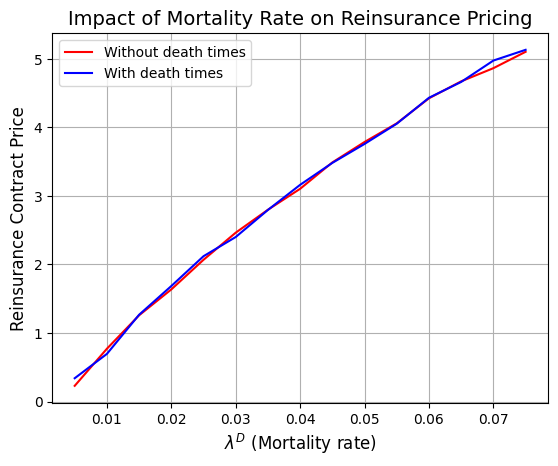

In [26]:
npaths = 300000
x = np.arange(0.005, 0.08, 0.005)
value1 = []
value2=[]
for lambda_param in x: 
    contract_price1 = model.deterministic_reinsurance_price(ts, Kmat, Kd, alpha, lambda_param, npaths,payoff_put,give_var = False, time_death_simulation=False)
    contract_price2 = model.deterministic_reinsurance_price(ts, Kmat, Kd, alpha, lambda_param, npaths,payoff_put,give_var = False, time_death_simulation=True)
    value1.append(contract_price1)
    value2.append(contract_price2)

plt.plot(x, value1, color='r', label="Without death times")
plt.plot(x, value2, color='b', label="With death times")
plt.xlabel(r"$\lambda^{D}$ (Mortality rate)", fontsize=12)
plt.ylabel("Reinsurance Contract Price", fontsize=12)
plt.title("Impact of Mortality Rate on Reinsurance Pricing", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Adapted Longstaff-Schwartz Algorithm for the Uncertain Mortality Rate Model</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

**It is possible to price reinsurance deals using a modified Longstaff-Schwartz algorithm. The procedure is detailed below.**

**Step 1:**

Simulate $N_1$ random future market paths at dates $t_0, \cdots, t_n = T$. On each path $p$, denote by

- $X^p_{t_k}$ the underlying asset price at time $t_k$
- $\lambda^{L,p}_{t_k}$ and $\lambda^{D,p}_{t_k}$ our estimates of the optimal lapse and death rates at time $t_k$
- $C^p_{t_k}$ our estimate of the sum of all future cashflows from $t_k$ onwards, averaging over death and lapse events with lapse and death rates $\lambda^{L,p}_{t_j}$ and $\lambda^{D,p}_{t_j}$ for $t_j > t_k$, provided that no death or lapse has occurred up to time $t_k$

**Step 2:**

At date $t_n = T$,

$$
C^{p}_{t_n} = u^{\text{mat}} \left( t_n, X^{p}_{t_n} \right)
$$

$$
\lambda^{L, p}_{t_n} = \Lambda^L \left( t_n, u^L \left( t_n, X^{p}_{t_n} \right) - u^{p}_{t_n} \right)
$$

$$
\lambda^{D, p}_{t_n} = \Lambda^D \left( t_n, u^D \left( t_n, X^{p}_{t_n} \right) - u^{p}_{t_n} \right)
$$

**Step 3:**

At date $t_k$ with $0 = k < n$,

$$
\begin{aligned}
C^{p}_{t_k} = & \exp\left( -\lambda^{L, p}_{t_{k+1}} \Delta t_{k+1} \right) \exp\left( -\lambda^{D, p}_{t_{k+1}} \Delta t_{k+1} \right) C^{p}_{t_{k+1}} 
- \alpha \Delta t_{k+1} \\
& + \left( 1 - \exp\left( -\lambda^{L, p}_{t_{k+1}} \Delta t_{k+1} \right) \right) \exp\left( -\lambda^{D, p}_{t_{k+1}} \Delta t_{k+1} \right) u^L \left( t_{k+1}, X^{p}_{t_{k+1}} \right) \\
& + \left( 1 - \exp\left( -\lambda^{D, p}_{t_{k+1}} \Delta t_{k+1} \right) \right) u^D \left( t_{k+1}, X^{p}_{t_{k+1}} \right)
\end{aligned}
$$

**Step 4:**

Find a functional estimate $\hat{u} \left( t_k, X_{t_k}^p \right)$ of  $\mathbb{E}^{\mathbb{Q}} \left[ C^p_{t_k} \middle| X^p_{t_k} \right]$ by parametric or non-parametric regression.

Update the mortality and lapse rates at $t_k$ by

$$
\lambda^{L, p}_{t_k} =
\begin{cases}
\overline{\lambda}^L(t_k) & \text{if } u^L(t_k, X^{p}_{t_k}) - \hat{u}(t_k, X^{p}_{t_k}) \geq 0 \\
\underline{\lambda}^L(t_k) & \text{otherwise}
\end{cases}
$$

$$
\lambda^{D, p}_{t_k} =
\begin{cases}
\overline{\lambda}^D(t_k) & \text{if } u^D(t_k, X^{p}_{t_k}) - \hat{u}(t_k, X^{p}_{t_k}) \geq 0 \\
\underline{\lambda}^D(t_k) & \text{otherwise}
\end{cases}
$$

With these definitions of $\lambda^{L,p}_{t_k}$ and $\lambda^{D,p}_{t_k}$,  we can now estimate the $C^p_{t_{k-1}}$ at $t_{k-1}$, etc. This is how the backward induction works.

**Step 5:**

Simulate $N_2$ new independent paths to obtain a lower-bound price.

At date $t_n = T$,

$$
C^p_{t_n} = u^{\text{mat}} \left( t_n, X^p_{t_n} \right)
$$

At date $t_k$, $k < n$,

$$
\begin{aligned}
C^p_{t_k} = & \exp\left( -\lambda^{L, p}_{t_{k+1}} \Delta t_{k+1} \right) \exp\left( -\lambda^{D, p}_{t_{k+1}} \Delta t_{k+1} \right) C^p_{t_{k+1}} 
- \alpha \Delta t_{k+1} \\
& + \left( 1 - \exp\left( -\lambda^{L, p}_{t_{k+1}} \Delta t_{k+1} \right) \right) \exp\left( -\lambda^{D, p}_{t_{k+1}} \Delta t_{k+1} \right) u^L \left( t_{k+1}, X^p_{t_{k+1}} \right) \\
& + \left( 1 - \exp\left( -\lambda^{D, p}_{t_{k+1}} \Delta t_{k+1} \right) \right) u^D \left( t_{k+1}, X^p_{t_{k+1}} \right)
\end{aligned}
$$

where $\lambda^{L, p}_{t_k}$ and $\lambda^{D, p}_{t_k}$ ($1 \leq p \leq N_2$) are determined by comparing 
$u^L \left( t_k, X^p_{t_k} \right)$ and $u^D \left( t_k, X^p_{t_k} \right)$ with the functional estimate 
$\hat{u} \left( t_k, X^p_{t_k} \right)$, where $\hat{u}$ was computed during step 4.

Averaging $C^p_{t_0}$ across all $N_2$ paths to get a lower-bound estimate.


**Note:**

We still use piecewise-linear fit as well as the same bound for $\lambda^D$. 

We will then compare the BSDE scheme with the Longstaff-Schwartz-like scheme in terms of variance. A two-step procedure is performed for each method (regression and indedenpent pricing)

In [27]:
# Longstaff-Schwartz algorithm for Uncertain Mortality Rate Model

def LS_uncertain_mortality_reinsurance_price (self, n_paths1,n_paths2, ts, payoff_function,Kmat,Kd,lambda_min,lambda_max,alpha,xknots =10):

    """Pricing using  using Longstaff-Schwartz algorithm

    Parameters
    ----------
    n_paths1 : scalar
               Number of simulated paths for the determination of the optimal strategy (the coefficients for our estimation of the continuation value) 
    n_paths2 : scalar
               Number of new independent paths to obtain the lower bound price
    ts : scalar or array_like 
         Discrete knots of the subdivisions of the current date and the maturity. 
    payoff_function : function (S : scalar or array like, K : scalar or array like)
                      Payoff function for the derivatives. 
                      S : Price of the underlying
                      K : Strike 
                      Return : scalar or array like
    Kmat: scalar or array_like
        The strike of the option at maturity.
    Kd: scalar or array_like
        The strike of the option if death occured before maturity.
    lambda_min : scalar or array_like
                 Lower bound of the uncertain volatility
    lambda_max : scalar or array_like
                 Higher bound of the uncertain volatility
    alpha: scalar or array_like
           The constant fee to pay during the life of the re-insurance deal 
    xknots : scalar
             Number of knots wanted for the piecewise linear function to estimate the continuation value 
    Returns
    -------
    price: scalar
        The lower bound price of the reinsurance deal.

    Example
    --------
    >>> model = insurance_model(X0=100, vol=0.3, r=0, q=0)
    >>> model.deterministic_reinsurance_price(5000, 50000, [0., 0.08333333, 0.16666667, 0.25, 0.33333333, 0.41666667, 0.5, 0.58333333, 0.66666667, 0.75, 0.83333333, 0.91666667, 1],payoff_put, 90, 100, 3, 0.025, 0.04,10)
    4.1076581734073345
    """

    paths = blackscholes_mc(S=self.X0, vol=self.vol, r=self.r, q=self.r, ts=ts, npaths=n_paths1) # Generate the first set of paths
    betas = np.zeros((len(ts)-1, xknots +2), dtype=np.float64) # Allocate the memory to store the coefficients to estimate continuation values
    V = payoff_function(paths[-1],Kmat) # Initialisation of continuation value
    lambd = np.where(payoff_function(paths[-1],Kd) >= V, lambda_max, lambda_min) # array of lambda_min and lambda_max where according to exercise >= continuation
    
    for i in range(len(ts)-2, 0, -1):
        dt = ts[i+1]-ts[i] # Step of the discretisation

        # Update of the continuation value
        p = 1-np.exp(-lambd*dt) 
        V = p*payoff_function(paths[i+1],Kd) + (1-p)*V - alpha*dt

        # Computation of the next continuation value by determining the coefficients 
        knots = np.linspace(np.percentile(paths[i], 1), np.percentile(paths[i], 99), num=xknots)  # Knots determination
        continuation_value, coeffs = pwlinear_fit_bis(paths[i], V, knots)  # Computation of the continuation value as well as the linked coefficients
        betas[i] = coeffs  # We store the coefficients for the next evaluation with independant path
        lambd = np.where(payoff_function(paths[i],Kd) >= continuation_value, lambda_max, lambda_min) # array of lambda_min and lambda_max where according to exercise >= continuation

    paths = blackscholes_mc(S=self.X0, vol=self.vol, r=self.r, q=self.r, ts=ts, npaths=n_paths2) # Generate the second set of paths
    V = payoff_function(paths[-1],Kmat) # Initialisation of continuation value
    lambd = np.where(payoff_function(paths[-1],Kd) >= V, lambda_max, lambda_min) # array of lambda_min and lambda_max where according to exercise >= continuation
    
    for i in range(len(ts)-2, -1, -1):
        dt = ts[i+1]-ts[i] # Step of the discretisation

        # Update of the continuation value
        p = 1-np.exp(-lambd*dt)
        V = p*payoff_function(paths[i+1],Kd) + (1-p)*V - alpha*dt

        # Computation of the next continuation value by using the precedent computed coefficients 
        knots = np.linspace(np.percentile(paths[i], 1), np.percentile(paths[i], 99), num=xknots) # Knots determination
        A = np.vstack([f(paths[i]) for f in pwlinear_basis(knots)]).T # Implementation of our piecewise linear function
        continuation_value = A @ betas[i]  # Computation of the continuation value using the given coefficients
        lambd = np.where(payoff_function(paths[i],Kd) >= continuation_value, lambda_max, lambda_min) # array of lambda_min and lambda_max where according to exercise >= continuation

    return (np.mean(V)) #return the given price
    
setattr(insurance_model, "LS_uncertain_mortality_reinsurance_price", LS_uncertain_mortality_reinsurance_price) #add this method to the class insurance model

In [28]:
n_paths1 = 100000 # Number of paths to determinate the coefficients
n_paths2 = 100000 # Number of paths to evaluate the lower bound price 
lambda_min=0.005 
lambda_max=0.04
xknots = 10 # Number of knots for the regression using piecewise linear functions

print(f"\nReinsurance-deal pricing with adapted LS algorithm using piecewise linear function : {model.LS_uncertain_mortality_reinsurance_price (n_paths1,n_paths2, ts, payoff_put,Kmat,Kd,lambda_min,lambda_max,alpha,xknots):.4f}\n")


Reinsurance-deal pricing with adapted LS algorithm using piecewise linear function : 3.2955



In [29]:
BSDE_1_value = [] #To store the value
LS_value = []
n_paths1 = 5000 # Number of paths to determinate the coefficients
n_paths2 = 50000 # Number of paths to evaluate the lower bound price 
lambda_min=0.005
lambda_max=0.04
xknots = 10 # Number of knots for the regression using piecewise linear functions

for i in range (20): 
    BSDE_1_value.append(model.lower_bound_BSDE_1_uncertain_mortality_reinsurance_price(n_paths1,n_paths2, ts, payoff_put,Kmat,Kd,lambda_min,lambda_max,alpha,xknots))
    LS_value.append(model.LS_uncertain_mortality_reinsurance_price (n_paths1,n_paths2, ts, payoff_put,Kmat,Kd,lambda_min,lambda_max,alpha,xknots))

print(f"\nAverage contract value with the 1-BSDE algorithm : {np.mean(BSDE_1_value):.4f}")
print(f"Average contract value with the adapted LS algorithm : {np.mean(LS_value):.4f}\n")

print(f"\nVariance with the 1-BSDE algorithm : {np.var(BSDE_1_value):.4f}")
print(f"Variance with the adapted LS algorithm : {np.var(LS_value):.4f}\n")


Average contract value with the 1-BSDE algorithm : 3.2320
Average contract value with the adapted LS algorithm : 3.1610


Variance with the 1-BSDE algorithm : 0.1116
Variance with the adapted LS algorithm : 0.0071



We observe that the adapted Longstaff-Schwartz method exhibits lower variance compared to the 1-BSDE approach.

Indeed, for hedging purposes, it is preferable to choose the highest possible price.

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Optimal fee $\alpha$ that makes the deal costless at inception</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

We now aim to determine the value of $\alpha$ that makes **the contract costless at inception**. To this end, we will compute this value using both methods (1-BSDE and the adapted Longstaff-Schwartz) in order to obtain a more robust approximation.



In [30]:
import scipy.optimize as opt

# Define the function we are looking to minimize
def BSDE_1_costless_alpha(alpha):
    return model.lower_bound_BSDE_1_uncertain_mortality_reinsurance_price(n_paths1,n_paths2, ts, payoff_put,Kmat,Kd,lambda_min,lambda_max,alpha,xknots) - 0
def LS_costless_alpha(alpha):
    return model.LS_uncertain_mortality_reinsurance_price (n_paths1,n_paths2, ts, payoff_put,Kmat,Kd,lambda_min,lambda_max,alpha,xknots) - 0

# We do it five times to avoid specific biais due to a specific paths 
BSDE_1_alpha_solution = []
LS_alpha_solution = []
for i in range (5): 
    BSDE_1_alpha_solution.append(opt.brentq(BSDE_1_costless_alpha, a=0, b=10))
    LS_alpha_solution.append(opt.brentq(LS_costless_alpha, a=0, b=10))

print(f"\nMin & Max value of costless α for 1-BSDE :  {np.min(BSDE_1_alpha_solution):.5f}, {np.max(BSDE_1_alpha_solution):.5f}")
print(f"Mean and var value costless α for 1-BSDE :  {np.mean(BSDE_1_alpha_solution):.5f}, {np.var(BSDE_1_alpha_solution):.5f}")
print(f"\nMin & Max value of costless α for LS :  {np.min(LS_alpha_solution):.5f}, {np.max(LS_alpha_solution):.5f}")
print(f"Mean and var value costless α for LS :  {np.mean(LS_alpha_solution):.5f}, {np.var(LS_alpha_solution):.5f}")
print(f"\nMean of LS & 1-BSDE : {np.mean(LS_alpha_solution + BSDE_1_alpha_solution):.5f}\n")


Min & Max value of costless α for 1-BSDE :  3.33946, 3.39227
Mean and var value costless α for 1-BSDE :  3.36404, 0.00032

Min & Max value of costless α for LS :  3.36480, 3.39484
Mean and var value costless α for LS :  3.37692, 0.00011

Mean of LS & 1-BSDE : 3.37048



We can therefore consider that for $\alpha \sim 3.37$, the deal is costless at inception. 

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Link with American Put option</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

If we suppose that $K_D=0$, then the default event is equivalent to a lapse with no mortality payoff. The policyholder has the option to lapse the contract at any time and receive nothing. 

It has been observed that insurance subscribers do not lapse optimally, which explains the use of the uncertain lapse model with minimum and maximum lapse rates $\underline{\lambda}$, $\overline{\lambda}$. 

If **the policyholde lapse optimally**, the policyholder should lapse as soon as $u^{L} > u$. 
 
In other words, the policyholder should lapse as soon as the continuation value becomes **negative** i.e as soon he looses money on average by still paying the managing fees. 

This correspond to the pricing of **an American put option**, and thefore the contract should be priced as so. 

We make the hypothesis the fee $\alpha$ exactly matchs the managing fee the suscriber is paying to th insurance company. 

We compute the price of the contract with two different methods: 

- Using the adapted Longstaff Schwartz for uncertainty Mortality Rate model by posing $\underline{\lambda}^D = 0$ and $\overline{\lambda}^D = +\infty$
- By pricing an american put option using the classic Longstaff Schwartz algorithm (see project Longstaff-Schwartz algorithm for bermudean options in the repositories of Constantin Gleyze in Github)

In [31]:
def LS_optimal_policyholder_uncertain_mortality_reinsurance_price (self, n_paths1,n_paths2, ts, payoff_function,Kmat,Kd,alpha,xknots =10):

    """Pricing using  using Longstaff-Schwartz algorithm for a optimal policyholder strategist

    Parameters
    ----------
    n_paths1 : scalar
               Number of simulated paths for the determination of the optimal strategy (the coefficients for our estimation of the continuation value) 
    n_paths2 : scalar
               Number of new independent paths to obtain the lower bound price
    ts : scalar or array_like 
         Discrete knots of the subdivisions of the current date and the maturity. 
    payoff_function : function (S : scalar or array like, K : scalar or array like)
                      Payoff function for the derivatives. 
                      S : Price of the underlying
                      K : Strike 
                      Return : scalar or array like
    Kmat: scalar or array_like
        The strike of the option at maturity.
    Kd: scalar or array_like
        The strike of the option if death occured before maturity.
    alpha: scalar or array_like
           The constant fee to pay during the life of the re-insurance deal 
    xknots : scalar
             Number of knots wanted for the piecewise linear function to estimate the continuation value 
    Returns
    -------
    price: scalar
        The lower bound price of the reinsurance deal.

    Example
    --------
    >>> model = insurance_model(X0=100, vol=0.3, r=0, q=0)
    >>> model.LS_optimal_policyholder_uncertain_mortality_reinsurance_price(5000, 50000, [0., 0.08333333, 0.16666667, 0.25, 0.33333333, 0.41666667, 0.5, 0.58333333, 0.66666667, 0.75, 0.83333333, 0.91666667, 1],payoff_put, 90, 100, 3, 10)
    9.18941575590529
    """

    paths = blackscholes_mc(S=self.X0, vol=self.vol, r=self.r, q=self.r, ts=ts, npaths=n_paths1) # Generate the first set of paths
    betas = np.zeros((len(ts)-1, xknots+2), dtype=np.float64) # Allocate the memory to store the coefficients to estimate continuation values
    V = payoff_function(paths[-1],Kmat) # Initialisation of continuation value
    lambd = np.where(payoff_function(paths[-1],Kd) >= V, 1, 0) # array of lambda_min and lambda_max where according to exercise >= continuation
    p = np.zeros_like(lambd)
    for i in range(len(ts)-2, 0, -1):
        dt = ts[i+1]-ts[i] # Step of the discretisation

        # Update of the continuation value
        p[lambd ==1] = 1
        p[lambd == 0] = 0
        V = p*payoff_function(paths[i+1],Kd) + (1-p)*V - alpha*dt

        # Computation of the next continuation value by determining the coefficients 
        knots = np.linspace(np.percentile(paths[i], 1), np.percentile(paths[i], 99), num=xknots)  # Knots determination
        continuation_value, coeffs = pwlinear_fit_bis(paths[i], V, knots)  # Computation of the continuation value as well as the linked coefficients
        betas[i] = coeffs  # We store the coefficients for the next evaluation with independant path
        lambd = np.where(payoff_function(paths[i],Kd) >= continuation_value, 1, 0) # array of lambda_min and lambda_max where according to exercise >= continuation

    paths = blackscholes_mc(S=self.X0, vol=self.vol, r=self.r, q=self.r, ts=ts, npaths=n_paths2) # Generate the second set of paths
    V = payoff_function(paths[-1],Kmat) # Initialisation of continuation value
    lambd = np.where(payoff_function(paths[-1],Kd) >= V, 1, 0) # array of lambda_min and lambda_max where according to exercise >= continuation
    p = np.zeros_like(lambd)

    for i in range(len(ts)-2, -1, -1):
        dt = ts[i+1]-ts[i] # Step of the discretisation

        # Update of the continuation value
        p[lambd ==1] = 1
        p[lambd == 0] = 0
        V = p*payoff_function(paths[i+1],Kd) + (1-p)*V - alpha*dt

        # Computation of the next continuation value by using the precedent computed coefficients 
        knots = np.linspace(np.percentile(paths[i], 1), np.percentile(paths[i], 99), num=xknots) # Knots determination
        A = np.vstack([f(paths[i]) for f in pwlinear_basis(knots)]).T # Implementation of our piecewise linear function
        continuation_value = A @ betas[i]  # Computation of the continuation value using the given coefficients
        lambd = np.where(payoff_function(paths[i],Kd) >= continuation_value, 1, 0) # array of lambda_min and lambda_max where according to exercise >= continuation

    return (np.mean(V)) #return the given price

# We add the method to the class
setattr(insurance_model, "LS_optimal_policyholder_uncertain_mortality_reinsurance_price", LS_optimal_policyholder_uncertain_mortality_reinsurance_price) #add this method to the class insurance model

In [32]:
def american_option_price_uncertain_mortality_reinsurance_price(self, n_paths1,n_paths2, ts, payoff_function,Kmat,alpha = 3,  xknots = 10):

    """Pricing using  using Longstaff-Schwartz algorithm an option of payoff 0 with monthly alpha_month to pay and the same option with a different strike for the maturity 

    Limitations: The algorithm consider there is no interest rate and the period is monthly

    Parameters
    ----------
    n_paths1 : scalar
               Number of simulated paths for the determination of the optimal strategy (the coefficients for our estimation of the continuation value) 
    n_paths2 : scalar
               Number of new independent paths to obtain the lower bound price
    ts : scalar or array_like 
         Discrete knots of the subdivisions of the current date and the maturity. 
    payoff_function : function (S : scalar or array like, K : scalar or array like)
                      Payoff function for the derivatives. 
                      S : Price of the underlying
                      K : Strike 
                      Return : scalar or array like
    Kmat: scalar or array_like
        The strike of the option at maturity.
    alpha: scalar or array_like
           The constant fee to pay during the life of the re-insurance deal 
    xknots : scalar
             Number of knots wanted for the piecewise linear function to estimate the continuation value 
    
    Returns
    -------
    price: scalar
        The lower bound price of the american option.

    Example
    --------
    >>> model = insurance_model(X0=100, vol=0.3, r=0, q=0)
    >>> model.american_option_price_uncertain_mortality_reinsurance_price(5000, 50000, [0., 0.08333333, 0.16666667, 0.25, 0.33333333, 0.41666667, 0.5, 0.58333333, 0.66666667, 0.75, 0.83333333, 0.91666667, 1],payoff_put, 90,3,10)
    4.456799206615022
    """
    
    S1 = blackscholes_mc(S=self.X0, vol=self.vol, r=self.r, q=self.r, ts=ts, npaths=n_paths1) # Generate the first set of paths
    to = np.full((len(ts), n_paths1), np.nan, dtype=np.float64) # Allocate the memory to store the stopping time 
    betas = np.zeros((len(ts)-1, xknots +2), dtype=np.float64)  # Allocate the memory to store the coefficients to estimate continuation values
    to[-1,:] = ts[-1] # The last stopping time is neccessarly the maturity
    V1 = payoff_function(S1[-1, :], Kmat) - alpha*(ts[-1]-ts[-2]) # Initialisation of continuation value
    
    for i in range(len(ts) - 2, 0, -1):
        
        # Computation of the next continuation value by determining the coefficients 
        knots = np.linspace(np.percentile(S1[i, :], 1), np.percentile(S1[i, :], 99), num=xknots)  # Knots determination
        continuation_value, coeffs = pwlinear_fit_bis(S1[i, :], V1, knots)  # Computation of the continuation value as well as the linked coefficients
        betas[i] = coeffs  # We store the coefficients for the next evaluation with independant path
        to[i, :] = np.where(continuation_value > 0, to[i+1], ts[i]) # We store the stopping times values 
        #V = payoff_function(S1[-1, :], Kmat) - alpha*(ts[i+1]-ts[i]) # We update the parameters for our continuation values
        V1 += - alpha*(ts[i+1]-ts[i]) # We update the parameters for our continuation values
        V1[to[i, :] == ts[i]] = 0
    
    S2 = blackscholes_mc(S=self.X0, vol=self.vol, r=self.r, q=self.r, ts=ts, npaths=n_paths2) # Generate the second set of paths
    to = np.full((len(ts), n_paths2), np.nan, dtype=np.float64) # Allocate the memory to store the stopping time 
    to[-1,:] = ts[-1] # The last stopping time is neccessarly the maturity
    V2 = payoff_function(S2[-1, :], Kmat) - alpha*(ts[-1]-ts[-2]) # Initialisation of continuation value
    
    for i in range(len(ts) - 2, 0, -1):

        # Computation of the next continuation value by determining the coefficients 
        knots = np.linspace(np.percentile(S2[i, :], 1), np.percentile(S2[i, :], 99), num=xknots)  # Knots determination
        A = np.vstack([f(S2[i, :]) for f in pwlinear_basis(knots)]).T # Implementation of our piecewise linear function
        continuation_value = A@betas[i] # Utilisation of the precedent coefficients
        to[i, :] = np.where(continuation_value > 0, to[i+1], ts[i]) # We store the stopping times values 
        V2 += - alpha*(ts[i+1]-ts[i]) # We update the parameters for our continuation values
        V2[to[i, :] == ts[i]] = 0

    # We return the price 
    return np.mean(V2)

# We add the method to our class
setattr(insurance_model, "american_option_price_uncertain_mortality_reinsurance_price", american_option_price_uncertain_mortality_reinsurance_price) #add this method to the class insurance model

In [34]:
n_paths1 = 100000 # Number of paths to determinate the coefficients
n_paths2 = 100000 # Number of paths to evaluate the lower bound price 
Kmat = 90 # Strike for the maturity option
Kd = 0 
xknots = 10 # Number of knots for the regression using piecewise linear functions
alpha = 3 # Constant fee

LS_opti_values = [] #To store the value
AO_values = []

for i in range (20): 
    LS_opti_values.append(model.LS_optimal_policyholder_uncertain_mortality_reinsurance_price (n_paths1,n_paths2, ts, payoff_put,Kmat,Kd,alpha,xknots))
    AO_values.append(model.american_option_price_uncertain_mortality_reinsurance_price(n_paths1,n_paths2, ts, payoff_put,Kmat,alpha,xknots=xknots))

print(f"\nAverage contract value with optimal execution from the adapted LS algorithm : {np.mean(LS_opti_values):.4f}")
print(f"Average contract value with the american option LS algorithm : {np.mean(AO_values):.4f}\n")

print(f"\nVariance with the adapted LS algorithm : {np.var(LS_opti_values):.4f}")
print(f"Variance with the american option LS algorithm : {np.var(AO_values):.4f}\n")


Average contract value with optimal execution from the adapted LS algorithm : 3.6489
Average contract value with the american option LS algorithm : 3.7975


Variance with the adapted LS algorithm : 0.0461
Variance with the american option LS algorithm : 0.0428

